In [1]:
from duneanalytics import DuneAnalytics
import json
import csv
import pandas as pd
import matplotlib.pyplot as plt

import sys
import os
sys.path.append(os.path.abspath("/home/vincent/devel/vjuge/oc-iml/modules/P2"))
from module_P2_utils import removeOutliers, plotBoxes
# %run ../../P2/module_P2_utils.ipynb


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

2022-09-06 21:49:11,629 : INFO : _init_num_threads : Note: NumExpr detected 32 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2022-09-06 21:49:11,629 : INFO : _init_num_threads : NumExpr defaulting to 8 threads.


In [2]:
def query(_query: int):
    dune = DuneAnalytics('altacryptos', 'Password01#')
    dune.login()
    dune.fetch_auth_token()
    # fetch query result id using query id
    # query id for any query can be found from the url of the query:
    # for example:
    # https://dune.com/queries/4494/8769 => 4494
    # https://dune.com/queries/3705/7192 => 3705
    # https://dune.com/queries/3751/7276 => 3751
    result_id = dune.query_result_id(query_id=_query)
    data = dune.query_result(result_id)
    data_reduced = data.get('data').get('get_result_by_result_id')
    # json_object = json.dumps(data_reduced, indent = 4)
    df = pd.json_normalize(data_reduced, sep='_')
    df.drop('__typename', axis=1, inplace=True)
    df.reset_index(inplace=True)
    return df


In [3]:
from pandas import DataFrame
def post_process(df: DataFrame):
    df['data_amount'] = pd.to_numeric(df['data_amount'])
    df['data_amount'] = df['data_amount'] / 1e19
    df['data_evt_block_time'] = pd.to_datetime(df['data_evt_block_time'])
    # print(df.dtypes)
    return df

In [4]:
def save_csv(df, title="dataframe_export.csv"):
    df.to_csv(title+".csv", sep=';')

In [5]:
df_deposit = query(405881)
df_deposit = post_process(df_deposit)
df_deposit.head()

,index,data_account,data_amount,data_contract_address,data_evt_block_number,data_evt_block_time,data_evt_index,data_evt_tx_hash,data_writeAmount
0,0,\xfeec05a103f3ee7c4c42ee1d799b39a5b4c62dbf,0.03,\x878f15ffc8b894a1ba7647c7176e4c01f74e140b,11030068,2020-10-10 21:12:16+00:00,15,\xbf75a59b8da886688f846dbfa2ba7c126e5f7de2eade...,300000000000000000000
1,1,\x71a5495b8cdcb160c65abae216725ff713507d16,0.50,\x878f15ffc8b894a1ba7647c7176e4c01f74e140b,11030078,2020-10-10 21:14:27+00:00,39,\x212a857b5fc2668fd4e9394107a98afb65917603991b...,5000000000000000000000
2,2,\x9e9ddaae1bcfcb13f4f1720b561fed7eb0ad03e0,0.50,\x878f15ffc8b894a1ba7647c7176e4c01f74e140b,11030078,2020-10-10 21:14:27+00:00,61,\x533d88d28b42477b1a2dbce61d064b16c7a5a96c2415...,5000000000000000000000
3,3,\x6f9bb7e454f5b3eb2310343f0e99269dc2bb8a1d,1.50,\x878f15ffc8b894a1ba7647c7176e4c01f74e140b,11030084,2020-10-10 21:15:17+00:00,195,\x12660703a4e0f0627fb77e271f90602b6cba5ef180d4...,15000000000000000000000
4,4,\x9e9ddaae1bcfcb13f4f1720b561fed7eb0ad03e0,0.40,\x878f15ffc8b894a1ba7647c7176e4c01f74e140b,11030086,2020-10-10 21:15:45+00:00,112,\x40fca0e812dcda18e86b466a5d3092f4c48f8b0b435e...,4000000000000000000000


<AxesSubplot:xlabel='data_evt_block_time', ylabel='data_amount'>

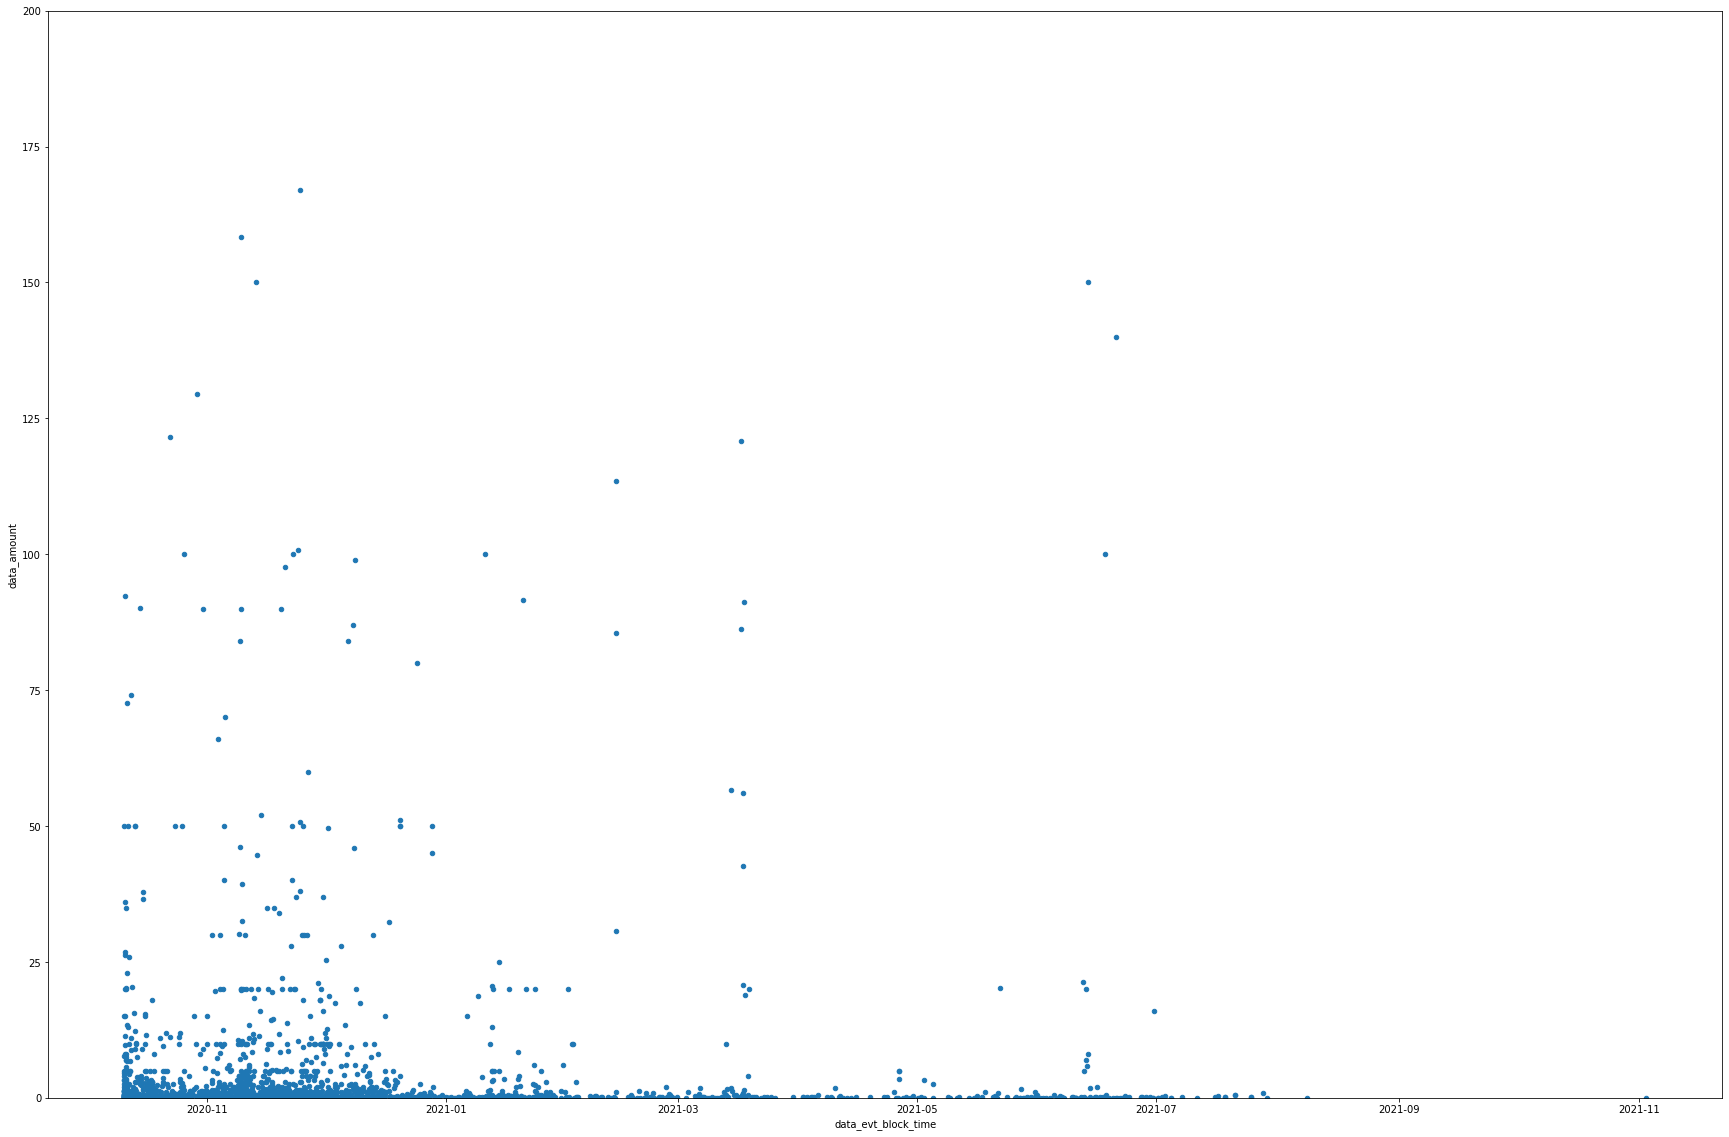

In [6]:
df_deposit.plot(kind='scatter', x='data_evt_block_time',  y='data_amount',  figsize=(30, 20), ylim=(0,200))
save_csv(df_deposit, "hegic_ethpool_deposit")

In [7]:
df_withdraw = query(1227764)
df_withdraw = post_process(df_withdraw)
df_withdraw.head()

,index,data_account,data_amount,data_contract_address,data_evt_block_number,data_evt_block_time,data_evt_index,data_evt_tx_hash,data_writeAmount
0,0,\xb49f86d0223437d3e6ce9767e88dfa0413682941,0.100110,\x878f15ffc8b894a1ba7647c7176e4c01f74e140b,11138219,2020-10-27 11:04:29+00:00,139,\x7054350ca2c733ceb8d9139002c996ff30a47b5fbf05...,999992198330774580666
1,1,\xcdf703190d949ff1b638b0fb6985dbdc7e62afd9,0.500550,\x878f15ffc8b894a1ba7647c7176e4c01f74e140b,11138299,2020-10-27 11:21:24+00:00,280,\x2e3ffadf2f8b395dcfc9e4b0325a405673962a41587a...,4999960991653872903327
2,2,\x3dca07e16b2becd3eb76a9f9ce240b525451f887,3.003287,\x878f15ffc8b894a1ba7647c7176e4c01f74e140b,11147921,2020-10-28 22:37:27+00:00,43,\x6f93f34fe145108558fa288ad391330a3600735292f8...,29999999722880331064490
3,3,\x2c2f838f0dac3f4915f4a57f3cb63abcd806ee40,0.300329,\x878f15ffc8b894a1ba7647c7176e4c01f74e140b,11149514,2020-10-29 04:37:26+00:00,276,\x2cb684c6a644542363b14cbfde881747d06cf6a95d9a...,2999999999999999999060
4,4,\x7b4778d265f5280f600a2917c6aaf59b44fb2429,8.999900,\x878f15ffc8b894a1ba7647c7176e4c01f74e140b,11149741,2020-10-29 05:26:22+00:00,260,\xd6bcad3577852ac4888aa256f8526ab4a58294ae94ea...,89900246273237077091534


<AxesSubplot:xlabel='data_evt_block_time', ylabel='data_amount'>

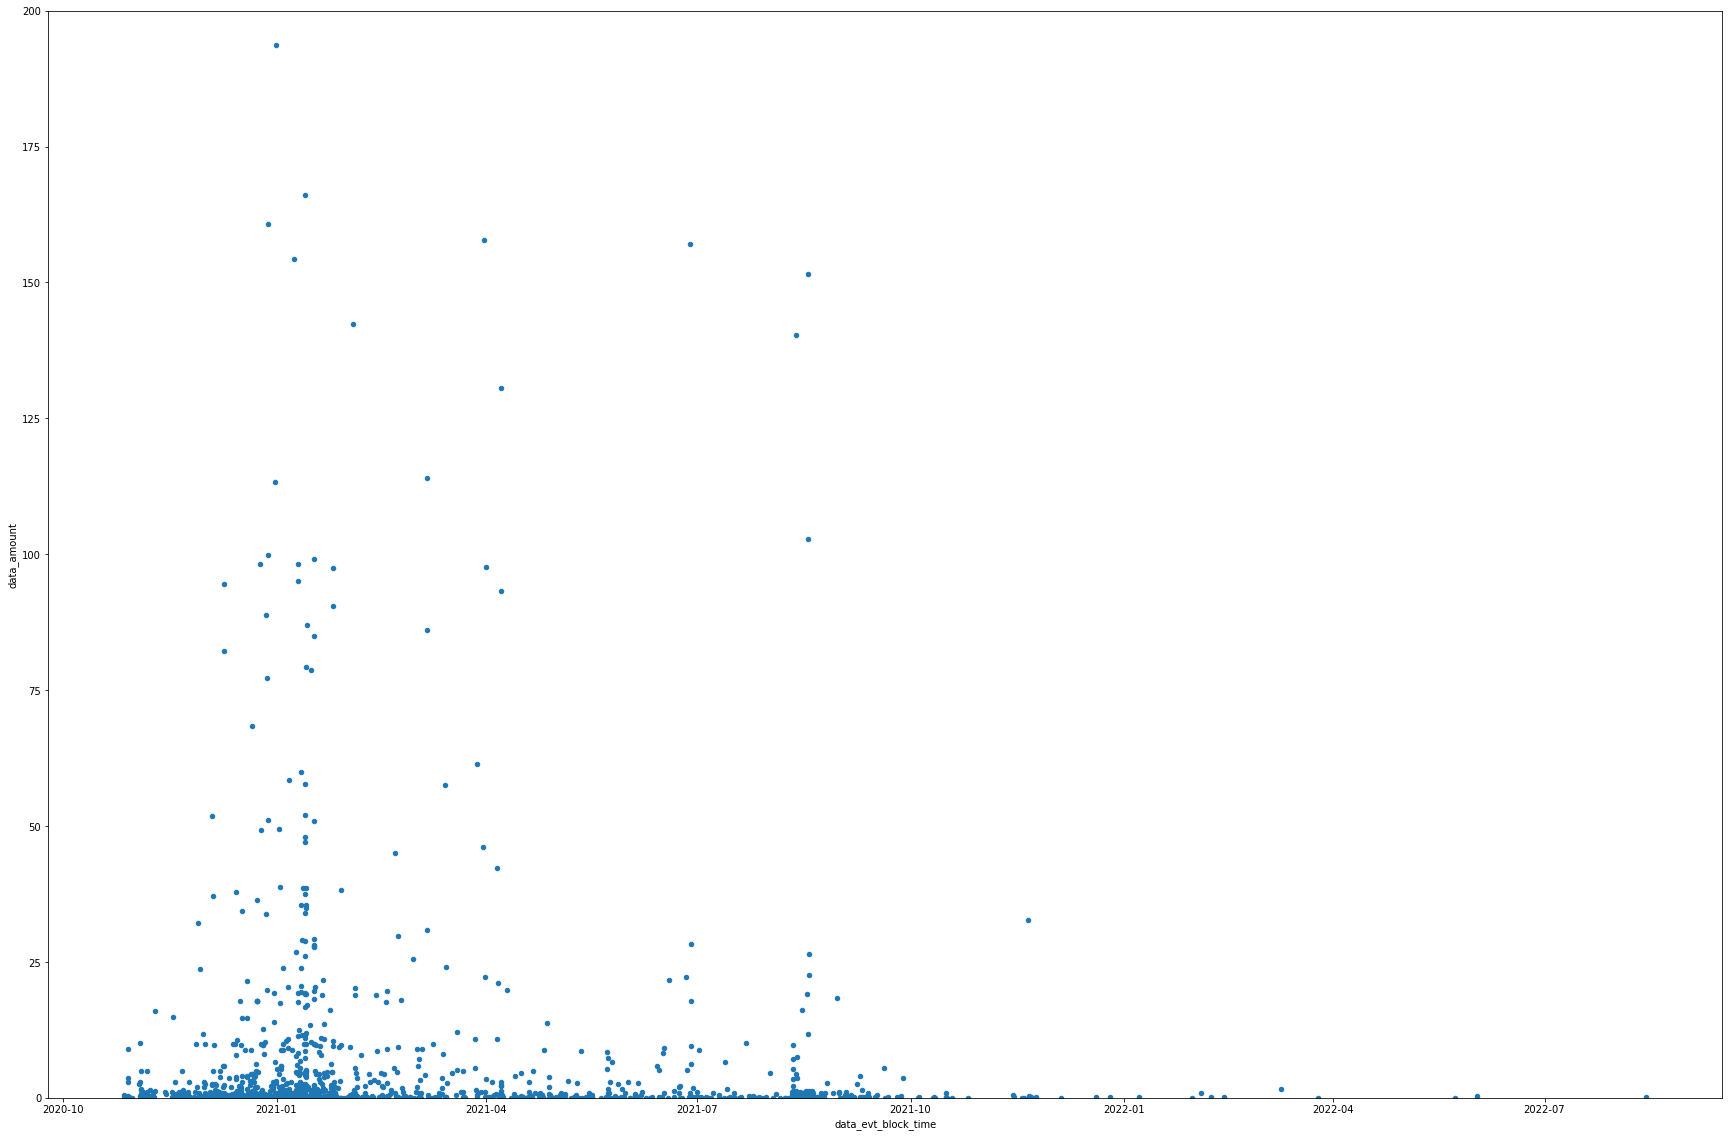

In [8]:
df_withdraw.plot(kind='scatter', x='data_evt_block_time',  y='data_amount',  figsize=(30, 20), ylim=(0,200))
save_csv(df_withdraw, "hegic_ethpool_withdraw")

In [9]:
df_uniswapLiquidityPool = query(1227901)

In [10]:
df_uniswapLiquidityPool['data_call_block_time'] = pd.to_datetime(df_uniswapLiquidityPool['data_call_block_time'])
df_uniswapLiquidityPool = df_uniswapLiquidityPool.astype({
    'data_amountADesired' : 'double',
    'data_amountAMin' : 'double',
    'data_amountBDesired' : 'double',
    'data_amountBMin' : 'double',
    'data_output_amountA' : 'double',
    'data_output_amountB' : 'double',
    'data_output_liquidity' : 'double',
})

In [11]:
df_uniswap_v2 = df_uniswapLiquidityPool[['data_call_block_time', 'data_output_liquidity']]
df_uniswap_v2 = df_uniswap_v2.loc[df_uniswapLiquidityPool.data_call_block_time < '2021-06-01 00:00:00+00:00']


<AxesSubplot:>

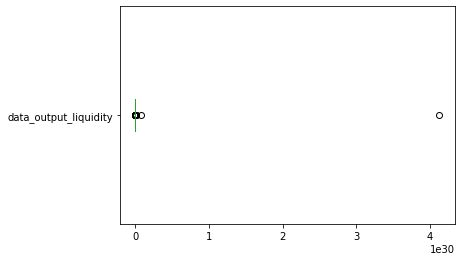

In [12]:
df_uniswap_v2['data_output_liquidity'].plot(kind='box', vert=False)

In [13]:
removeOutliers(df_uniswap_v2, df_uniswap_v2.select_dtypes('float').columns)

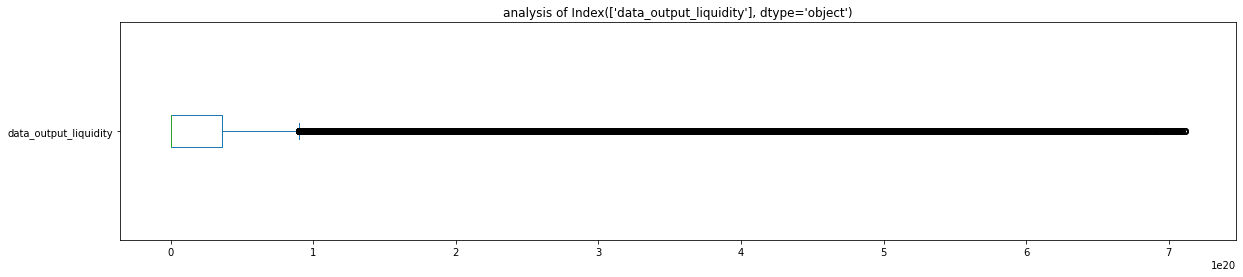

In [14]:
plotBoxes(df_uniswap_v2, df_uniswap_v2.select_dtypes('float').columns)

<AxesSubplot:xlabel='data_call_block_time', ylabel='data_output_liquidity'>

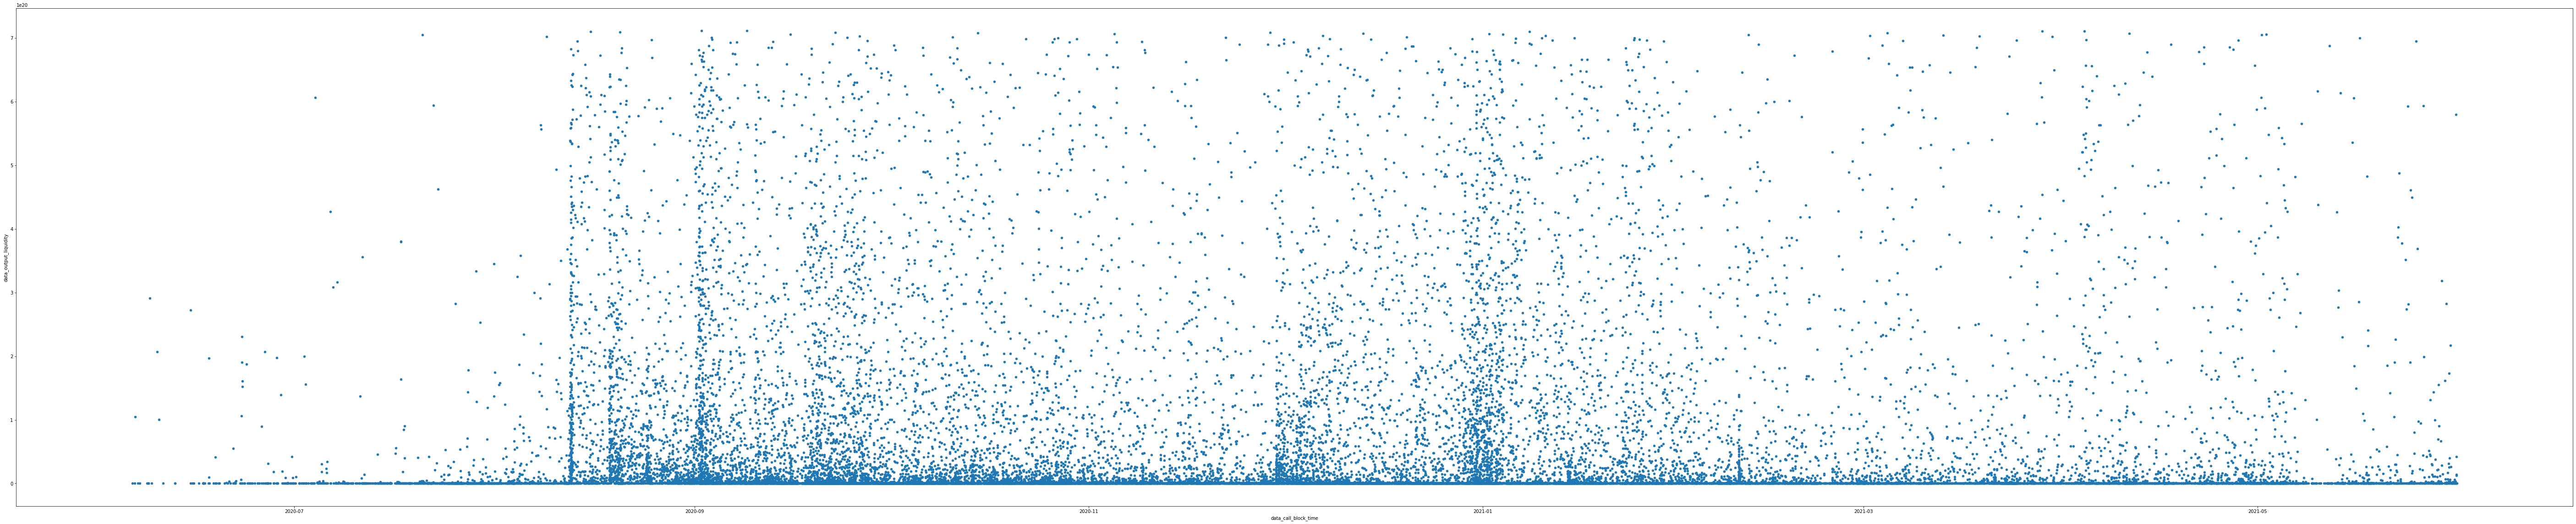

In [15]:
df_uniswap_v2.plot(kind='scatter', x='data_call_block_time',  y='data_output_liquidity',  figsize=(100, 20))


In [16]:
df_uniswapRemoveLiquidityPool = query(1233690)

In [17]:
df_uniswap_v2_remove_liquidity = df_uniswapRemoveLiquidityPool[['data_call_block_time', 'data_liquidity']]

In [18]:
df_uniswap_v2_remove_liquidity['data_call_block_time'] = pd.to_datetime(df_uniswap_v2_remove_liquidity['data_call_block_time'])
df_uniswap_v2_remove_liquidity = df_uniswap_v2_remove_liquidity.astype({
    'data_liquidity' : 'double'
})

/tmp/ipykernel_856772/745613074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uniswap_v2_remove_liquidity['data_call_block_time'] = pd.to_datetime(df_uniswap_v2_remove_liquidity['data_call_block_time'])


In [19]:
removeOutliers(df_uniswap_v2_remove_liquidity, df_uniswap_v2_remove_liquidity.select_dtypes('float').columns)


<AxesSubplot:xlabel='data_call_block_time', ylabel='data_liquidity'>

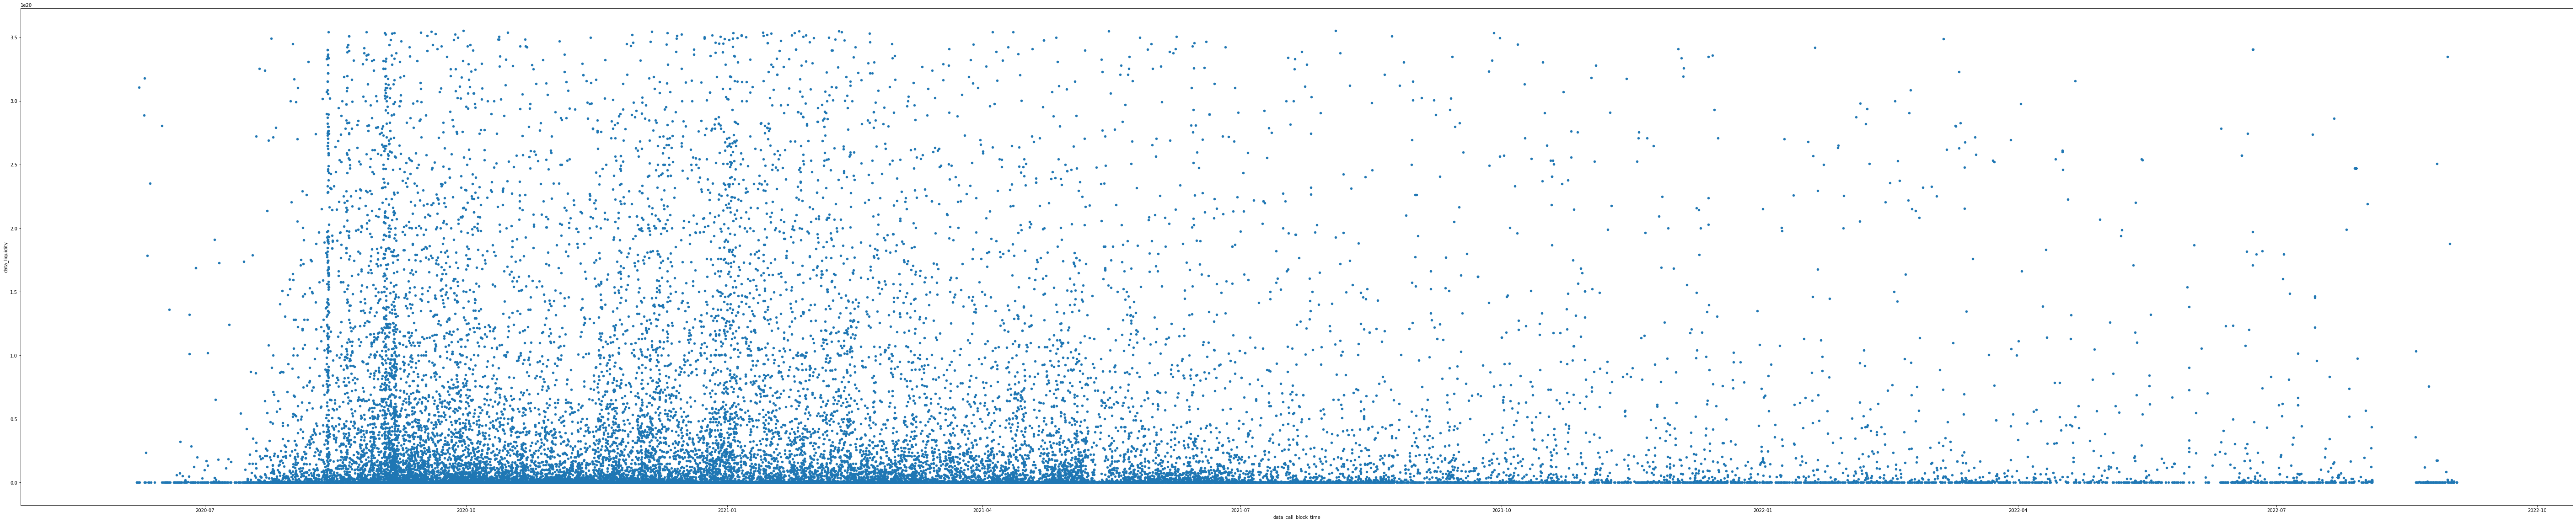

In [20]:
df_uniswap_v2_remove_liquidity.plot(kind='scatter', x='data_call_block_time',  y='data_liquidity',  figsize=(100, 20))


In [21]:
df_uniswap = df_uniswap_v2.merge(df_uniswap_v2_remove_liquidity, 'outer', 'data_call_block_time')

In [22]:
df_uniswap.head(100)

,data_call_block_time,data_output_liquidity,data_liquidity
0,2021-05-05 02:14:54+00:00,3.093678e+18,NaN
1,2020-11-11 13:59:51+00:00,4.076323e+13,NaN
2,2021-02-01 15:11:04+00:00,2.349178e+19,NaN
3,2021-01-09 19:44:41+00:00,2.644092e+14,NaN
4,2021-02-24 14:31:03+00:00,1.612098e+20,NaN
...,...,...,...
95,2021-02-23 01:31:36+00:00,2.411155e+15,NaN
96,2020-10-06 19:15:40+00:00,6.357961e+13,NaN
97,2020-09-03 17:48:19+00:00,NaN,NaN
98,2020-12-02 15:25:04+00:00,1.147315e+19,NaN


In [23]:
df_uniswap.fillna(0, inplace=True)

In [24]:
df_uniswap['liquidity']= df_uniswap['data_output_liquidity'] - df_uniswap['data_liquidity']

In [25]:
df_uniswap['inout'] = df_uniswap['liquidity'].cumsum()

In [26]:
df_uniswap


,data_call_block_time,data_output_liquidity,data_liquidity,liquidity,inout
0,2021-05-05 02:14:54+00:00,3.093678e+18,0.000000e+00,3.093678e+18,3.093678e+18
1,2020-11-11 13:59:51+00:00,4.076323e+13,0.000000e+00,4.076323e+13,3.093718e+18
2,2021-02-01 15:11:04+00:00,2.349178e+19,0.000000e+00,2.349178e+19,2.658550e+19
3,2021-01-09 19:44:41+00:00,2.644092e+14,0.000000e+00,2.644092e+14,2.658576e+19
4,2021-02-24 14:31:03+00:00,1.612098e+20,0.000000e+00,1.612098e+20,1.877955e+20
...,...,...,...,...,...
91521,2020-12-12 00:26:20+00:00,0.000000e+00,1.586602e+17,-1.586602e+17,7.549327e+23
91522,2021-05-10 06:29:56+00:00,0.000000e+00,7.890375e+19,-7.890375e+19,7.548538e+23
91523,2020-12-06 09:18:03+00:00,0.000000e+00,2.644863e+19,-2.644863e+19,7.548274e+23
91524,2021-03-07 18:26:43+00:00,0.000000e+00,6.683360e+18,-6.683360e+18,7.548207e+23


In [27]:
df_uniswap.head()

,data_call_block_time,data_output_liquidity,data_liquidity,liquidity,inout
0,2021-05-05 02:14:54+00:00,3.093678e+18,0.0,3.093678e+18,3.093678e+18
1,2020-11-11 13:59:51+00:00,4.076323e+13,0.0,4.076323e+13,3.093718e+18
2,2021-02-01 15:11:04+00:00,2.349178e+19,0.0,2.349178e+19,2.658550e+19
3,2021-01-09 19:44:41+00:00,2.644092e+14,0.0,2.644092e+14,2.658576e+19
4,2021-02-24 14:31:03+00:00,1.612098e+20,0.0,1.612098e+20,1.877955e+20


In [56]:
df_recap = df_uniswap[['data_call_block_time', 'inout']]
df_recap['tvl'] = df_recap.loc[:, ('inout')].div(1e18).round(4)

/tmp/ipykernel_856772/2651692588.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recap['tvl'] = df_recap.loc[:, ('inout')].div(1e18).round(4)


In [61]:
df_recap = df_recap.sort_values(by=['data_call_block_time'])

<AxesSubplot:xlabel='data_call_block_time'>

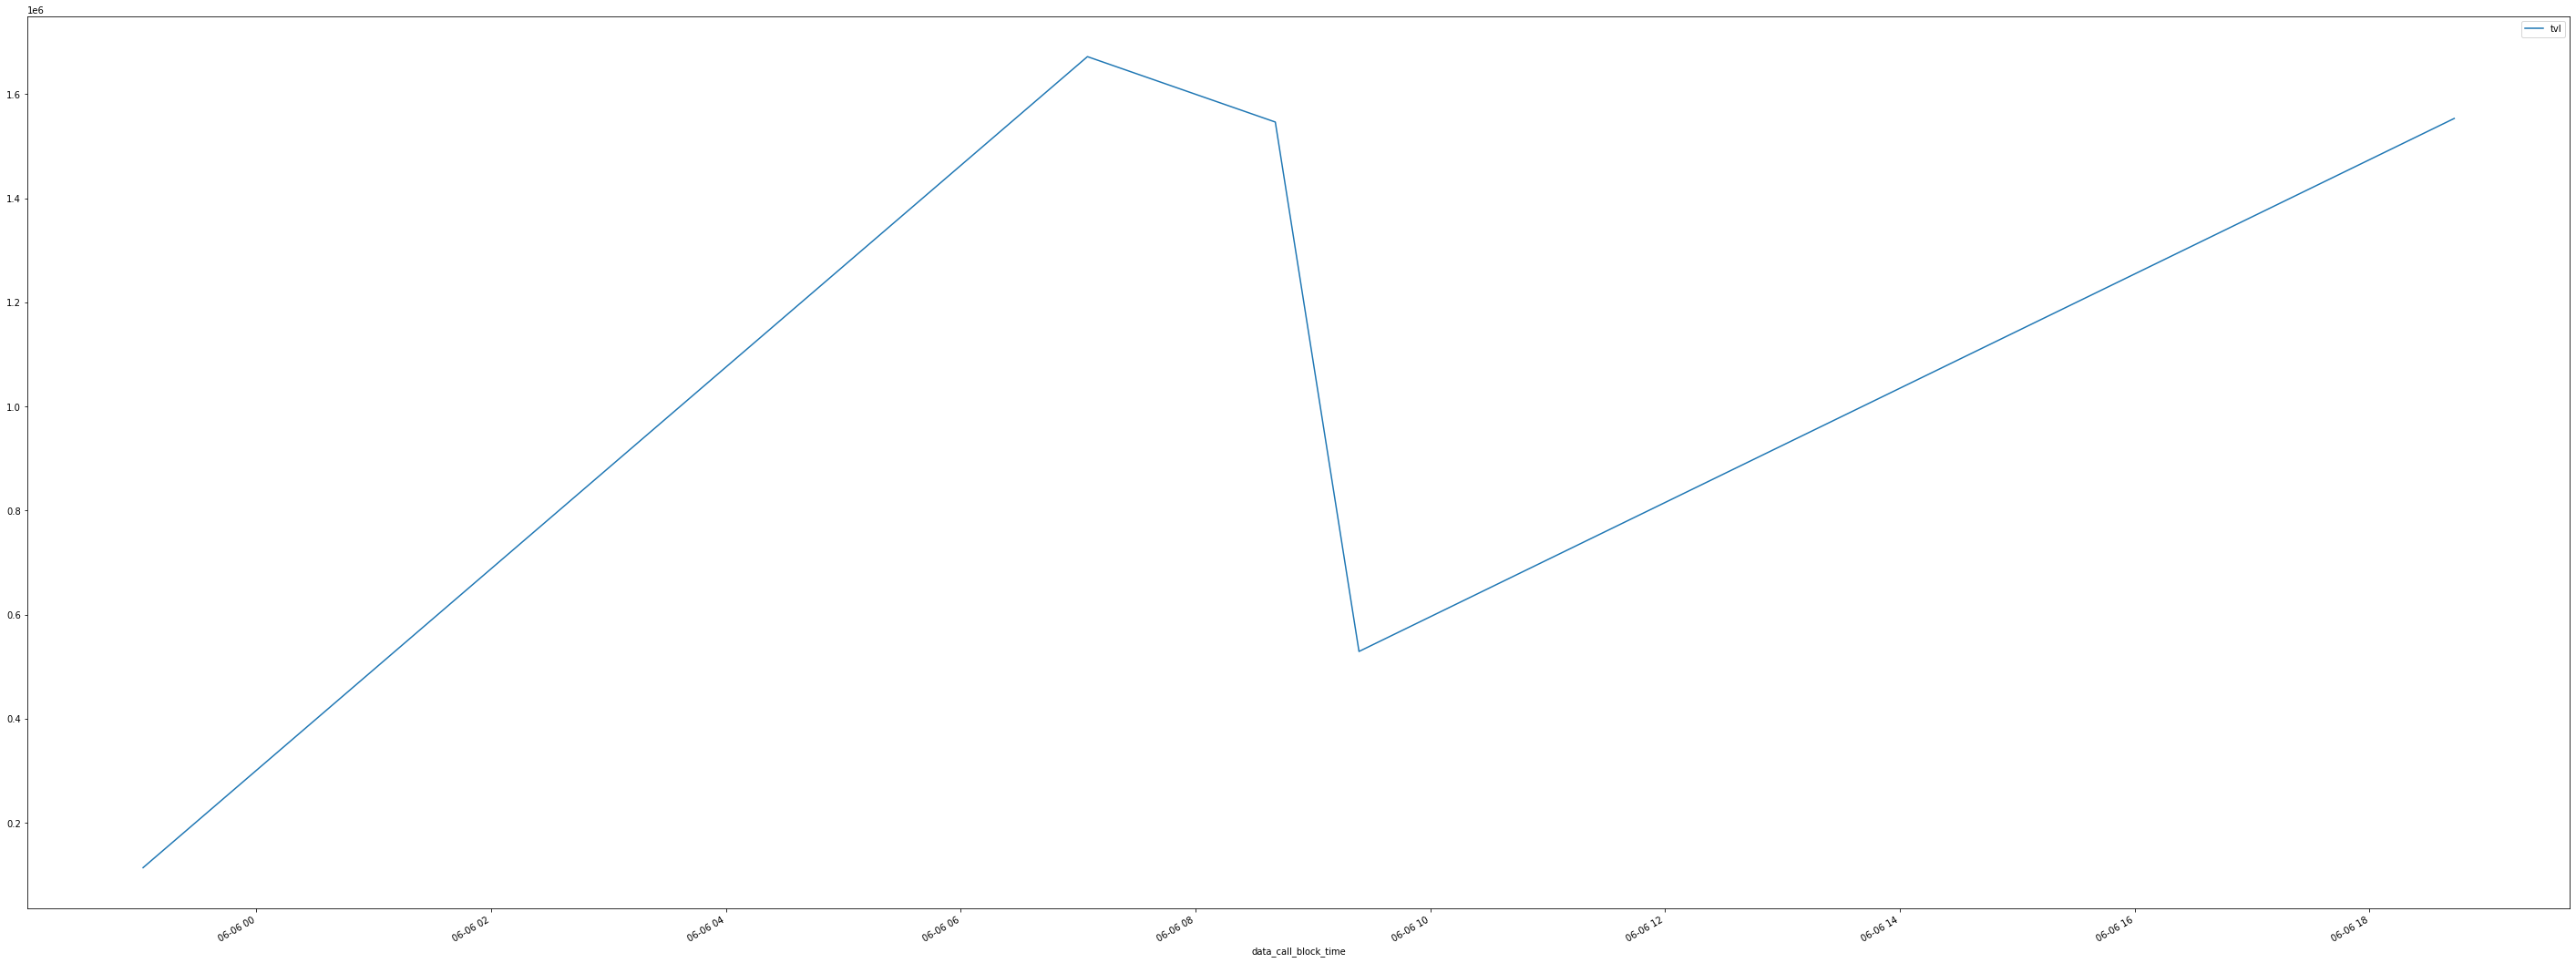

In [73]:
df_recap[0:5].plot(kind='line', x='data_call_block_time',  y='tvl',  figsize=(50, 20))


<AxesSubplot:>

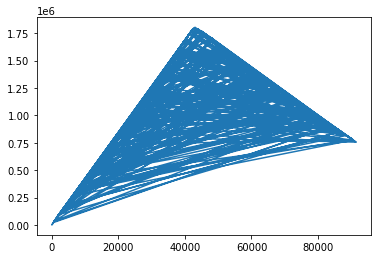

In [71]:
df_recap['tvl'][0:500].plot()

In [50]:
save_csv(df_recap, "uniswap_tvl")